In [12]:
import nibabel as nib
from neuromaps.datasets import available_annotations
from neuromaps import datasets
from neuromaps.resampling import resample_images
from neuromaps import parcellate
from nilearn.datasets import fetch_atlas_surf_destrieux
from neuromaps import datasets, images, nulls, resampling, plotting
from neuromaps.datasets import fetch_annotation
from neuromaps import transforms
from neuromaps.stats import compare_images
from brainspace.plotting import plot_surf
import numpy as np
from nibabel import freesurfer
from nibabel import gifti

# Read the basic files

In [2]:
BMI_HCP=list(['/dagher/dagher11/filip/Obesity_maps/data/BMI_lh.gii',
          '/dagher/dagher11/filip/Obesity_maps/data/BMI_rh.gii'])

In [3]:
BMI_ctx=transforms.fsaverage_to_fsaverage(BMI_HCP, '164k')

# Read mask of medial wall for fsaverage

In [8]:
medwall_idx_fsaverage_lh=(freesurfer.io.read_label('/dagher/dagher10/yyau/toolbox/freesurfer/subjects/fsaverage/label/lh.Medial_wall.label',
                        read_scalars=False))
medwall_idx_fsaverage_rh=(freesurfer.io.read_label('/dagher/dagher10/yyau/toolbox/freesurfer/subjects/fsaverage/label/rh.Medial_wall.label',
                        read_scalars=False))

# Set all vertices of medial wall to nan

In [9]:
BMI_ctx[0].agg_data()[medwall_idx_fsaverage_lh] = np.nan
BMI_ctx[1].agg_data()[medwall_idx_fsaverage_rh] = np.nan


# Transform fsaverage 164k to 10k for further analyses

In [10]:
BMI_10k=transforms.fsaverage_to_fsaverage(BMI_ctx, '10k')

 ...done. (2 seconds, 0 min)
Extracting data from /home/bic/fmorys/neuromaps-data/030343e2c52d5517d71ab63dbec6a5ae/fsaverage164k.tar.gz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /home/bic/fmorys/neuromaps-data/e38b96d96273aa064c22296eda1e5688/fsaverage10k.tar.gz..... done.


# Save files for plotting in the future

In [16]:
nib.save(BMI_10k[1], '/dagher/dagher11/filip/Obesity_maps/data/BMI_10k_R.gii')
nib.save(BMI_10k[0], '/dagher/dagher11/filip/Obesity_maps/data/BMI_10k_L.gii')


## Save annotations transformed to BMI space

In [24]:
for annotation in available_annotations():
    try:
        print(annotation)
        brain_map=datasets.fetch_annotation(source=annotation[0], desc=annotation[1])
        BMI_res, brain_map_res = resample_images(src=BMI_HCP, trg=brain_map, src_space='fsaverage', 
                                                 trg_space=annotation[2], method='linear', 
                                                 resampling='transform_to_src')
        #rotated = nulls.alexander_bloch(BMI_res, atlas='fsaverage', density='10k', n_perm=10000, seed=1234)
        nib.save(brain_map_res[0], '/dagher/dagher11/filip/Obesity_maps/data/'+annotation[0]+annotation[1]+'_L.gii')
        nib.save(brain_map_res[1], '/dagher/dagher11/filip/Obesity_maps/data/'+annotation[0]+annotation[1]+'_R.gii')
        #corr = compare_images(BMI_res, brain_map_res, metric='pearsonr', nulls=rotated)
        #print(corr)
    except:
        pass

('abagen', 'genepc1', 'fsaverage', '10k')
('aghourian2017', 'feobv', 'MNI152', '1mm')
('alarkurtti2015', 'raclopride', 'MNI152', '3mm')
('bedard2019', 'feobv', 'MNI152', '1mm')
('beliveau2017', 'az10419369', 'MNI152', '1mm')
('beliveau2017', 'cimbi36', 'MNI152', '1mm')
('beliveau2017', 'cumi101', 'MNI152', '1mm')
('beliveau2017', 'dasb', 'MNI152', '1mm')
('beliveau2017', 'sb207145', 'MNI152', '1mm')
('ding2010', 'mrb', 'MNI152', '1mm')
('dubois2015', 'abp688', 'MNI152', '1mm')
('dukart2018', 'flumazenil', 'MNI152', '3mm')
('dukart2018', 'fpcit', 'MNI152', '3mm')
('fazio2016', 'madam', 'MNI152', '3mm')
('finnema2016', 'ucbj', 'MNI152', '1mm')
('gallezot2010', 'p943', 'MNI152', '1mm')
('gallezot2017', 'gsk189254', 'MNI152', '1mm')
('hcps1200', 'megalpha', 'fsLR', '4k')
('hcps1200', 'megbeta', 'fsLR', '4k')
('hcps1200', 'megdelta', 'fsLR', '4k')
('hcps1200', 'meggamma1', 'fsLR', '4k')
('hcps1200', 'meggamma2', 'fsLR', '4k')
('hcps1200', 'megtheta', 'fsLR', '4k')
('hcps1200', 'megtimescale

 ...done. (2 seconds, 0 min)


('hillmer2016', 'flubatine', 'MNI152', '1mm')


 ...done. (1 seconds, 0 min)


('jaworska2020', 'fallypride', 'MNI152', '1mm')


 ...done. (1 seconds, 0 min)


('kaller2017', 'sch23390', 'MNI152', '3mm')


 ...done. (3 seconds, 0 min)


('kantonen2020', 'carfentanil', 'MNI152', '3mm')


 ...done. (1 seconds, 0 min)


('laurikainen2018', 'fmpepd2', 'MNI152', '1mm')


 ...done. (2 seconds, 0 min)


('margulies2016', 'fcgradient01', 'fsLR', '32k')


 ...done. (1 seconds, 0 min)


 ...done. (3 seconds, 0 min)


('margulies2016', 'fcgradient02', 'fsLR', '32k')


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


('margulies2016', 'fcgradient03', 'fsLR', '32k')


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


('margulies2016', 'fcgradient04', 'fsLR', '32k')


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


('margulies2016', 'fcgradient05', 'fsLR', '32k')


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


('margulies2016', 'fcgradient06', 'fsLR', '32k')


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


('margulies2016', 'fcgradient07', 'fsLR', '32k')


 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


('margulies2016', 'fcgradient08', 'fsLR', '32k')


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


('margulies2016', 'fcgradient09', 'fsLR', '32k')


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


('margulies2016', 'fcgradient10', 'fsLR', '32k')


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


('mueller2013', 'intersubjvar', 'fsLR', '164k')


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)
Extracting data from /home/bic/fmorys/neuromaps-data/d9a7bf9d3cbc8ffc454fc7f993cf94ae/fsLR164k.tar.gz..... done.


('naganawa2020', 'lsn3172176', 'MNI152', '1mm')


 ...done. (2 seconds, 0 min)


('neurosynth', 'cogpc1', 'MNI152', '2mm')


 ...done. (2 seconds, 0 min)


('norgaard2020', 'flumazenil', 'MNI152', '1mm')


 ...done. (2 seconds, 0 min)


('normandin2015', 'omar', 'MNI152', '1mm')


 ...done. (1 seconds, 0 min)


('radnakrishnan2018', 'gsk215083', 'MNI152', '1mm')


 ...done. (1 seconds, 0 min)


('raichle', 'cbf', 'fsLR', '164k')


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


('raichle', 'cbv', 'fsLR', '164k')


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


('raichle', 'cmr02', 'fsLR', '164k')


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


('raichle', 'cmruglu', 'fsLR', '164k')


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


('reardon2018', 'scalinghcp', 'civet', '41k')


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)
Extracting data from /home/bic/fmorys/neuromaps-data/2a4edacd44bc0b20457155074270b76a/civet41k.tar.gz..... done.


('reardon2018', 'scalingnih', 'civet', '41k')


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


('reardon2018', 'scalingpnc', 'civet', '41k')


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


('rosaneto', 'abp688', 'MNI152', '1mm')


 ...done. (1 seconds, 0 min)


('sandiego2015', 'flb457', 'MNI152', '1mm')


 ...done. (2 seconds, 0 min)


('sasaki2012', 'fepe2i', 'MNI152', '1mm')


 ...done. (1 seconds, 0 min)


('satterthwaite2014', 'meancbf', 'MNI152', '1mm')


 ...done. (1 seconds, 0 min)


('savli2012', 'altanserin', 'MNI152', '3mm')


 ...done. (2 seconds, 0 min)


('savli2012', 'dasb', 'MNI152', '3mm')


 ...done. (1 seconds, 0 min)


('savli2012', 'p943', 'MNI152', '3mm')


 ...done. (1 seconds, 0 min)


('savli2012', 'way100635', 'MNI152', '3mm')


 ...done. (1 seconds, 0 min)


('smart2019', 'abp688', 'MNI152', '1mm')


 ...done. (1 seconds, 0 min)


('smith2017', 'flb457', 'MNI152', '1mm')


 ...done. (1 seconds, 0 min)


('sydnor2021', 'SAaxis', 'fsLR', '32k')


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


('tuominen', 'feobv', 'MNI152', '2mm')


 ...done. (2 seconds, 0 min)


('turtonen2020', 'carfentanil', 'MNI152', '1mm')


 ...done. (1 seconds, 0 min)


('xu2020', 'FChomology', 'fsLR', '32k')


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


('xu2020', 'evoexp', 'fsLR', '32k')


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


# Calculate correlations with all available annotations

In [430]:
for annotation in available_annotations():
    try:
        print(annotation)
        brain_map=datasets.fetch_annotation(source=annotation[0], desc=annotation[1])
        BMI_res, brain_map_res = resample_images(src=BMI_10k, trg=brain_map, src_space='fsaverage', 
                                                 trg_space=annotation[2], method='linear', 
                                                 resampling='transform_to_src')
        rotated = nulls.alexander_bloch(BMI_res, atlas='fsaverage', density='10k', n_perm=10000, seed=1234)
        corr = compare_images(BMI_res, brain_map_res, metric='pearsonr', nulls=rotated)
        print(corr)
    except:
        pass

('abagen', 'genepc1', 'fsaverage', '10k')
(0.14673678576946259, 0.5224477552244775)
('aghourian2017', 'feobv', 'MNI152', '1mm')
(-0.09255792200565338, 0.5381461853814619)
('alarkurtti2015', 'raclopride', 'MNI152', '3mm')
(0.14988219738006592, 0.12498750124987501)
('bedard2019', 'feobv', 'MNI152', '1mm')
(-0.15804708003997803, 0.20957904209579042)
('beliveau2017', 'az10419369', 'MNI152', '1mm')
(0.012863333337008953, 0.793920607939206)
('beliveau2017', 'cimbi36', 'MNI152', '1mm')
(-0.01622484065592289, 0.8091190880911909)
('beliveau2017', 'cumi101', 'MNI152', '1mm')
(-0.1589098423719406, 0.25047495250474955)
('beliveau2017', 'dasb', 'MNI152', '1mm')
(-0.23323631286621094, 0.011998800119988001)
('beliveau2017', 'sb207145', 'MNI152', '1mm')
(-0.055843595415353775, 0.57994200579942)
('ding2010', 'mrb', 'MNI152', '1mm')
(0.13911652565002441, 0.41235876412358763)
('dubois2015', 'abp688', 'MNI152', '1mm')
(-0.026094626635313034, 0.8054194580541946)
('dukart2018', 'flumazenil', 'MNI152', '3mm'

# Surface area

# Read the basic files

In [26]:
BMI_HCP_area=list(['/dagher/dagher11/filip/Obesity_maps/data/BMI_area_lh.gii',
          '/dagher/dagher11/filip/Obesity_maps/data/BMI_area_rh.gii'])

In [27]:
BMI_ctx_area=transforms.fsaverage_to_fsaverage(BMI_HCP_area, '164k')

# Set all vertices of medial wall to nan

In [28]:
BMI_ctx_area[0].agg_data()[medwall_idx_fsaverage_lh] = np.nan
BMI_ctx_area[1].agg_data()[medwall_idx_fsaverage_rh] = np.nan

# Transform fsaverage 164k to 10k for further analyses

In [29]:
BMI_10k_area=transforms.fsaverage_to_fsaverage(BMI_ctx_area, '10k')

# Save files for plotting in the future

In [30]:
nib.save(BMI_10k_area[1], '/dagher/dagher11/filip/Obesity_maps/data/BMI_area_10k_R.gii')
nib.save(BMI_10k_area[0], '/dagher/dagher11/filip/Obesity_maps/data/BMI_area_10k_L.gii')


# Calculate correlations with all available annotations

In [ ]:
for annotation in available_annotations():
    try:
        print(annotation)
        brain_map=datasets.fetch_annotation(source=annotation[0], desc=annotation[1])
        BMI_res, brain_map_res = resample_images(src=BMI_10k_area, trg=brain_map, src_space='fsaverage', 
                                                 trg_space=annotation[2], method='linear', 
                                                 resampling='transform_to_src')
        rotated = nulls.alexander_bloch(BMI_res, atlas='fsaverage', density='10k', n_perm=10000, seed=1234)
        corr = compare_images(BMI_res, brain_map_res, metric='pearsonr', nulls=rotated)
        print(corr)
    except:
        pass

('abagen', 'genepc1', 'fsaverage', '10k')
(-0.19280381500720978, 0.35696430356964304)
('aghourian2017', 'feobv', 'MNI152', '1mm')
(0.16438035666942596, 0.24067593240675933)
('alarkurtti2015', 'raclopride', 'MNI152', '3mm')
(-0.05113248527050018, 0.6778322167783222)
('bedard2019', 'feobv', 'MNI152', '1mm')
(-0.01393503975123167, 0.9252074792520748)
('beliveau2017', 'az10419369', 'MNI152', '1mm')
(-0.07088306546211243, 0.12068793120687932)
('beliveau2017', 'cimbi36', 'MNI152', '1mm')
(-0.09123453497886658, 0.14878512148785122)
('beliveau2017', 'cumi101', 'MNI152', '1mm')
(-0.08148433268070221, 0.6078392160783922)
('beliveau2017', 'dasb', 'MNI152', '1mm')
(-0.13014158606529236, 0.26047395260473954)
('beliveau2017', 'sb207145', 'MNI152', '1mm')
(-0.08900177478790283, 0.33236676332366766)
('ding2010', 'mrb', 'MNI152', '1mm')
(0.056388936936855316, 0.7453254674532547)
('dubois2015', 'abp688', 'MNI152', '1mm')
(-0.03826126456260681, 0.7101289871012899)
('dukart2018', 'flumazenil', 'MNI152', '

# OLD

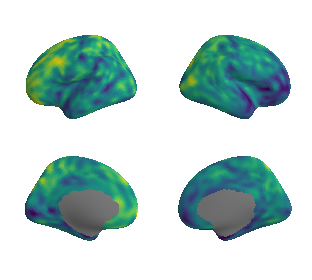

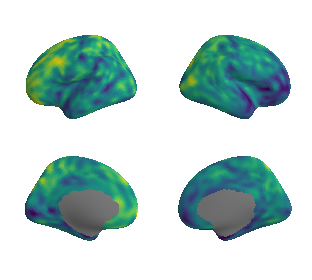

In [422]:
plotting.plot_surf_template(BMI_10k, 'fsaverage', '10k')

## Try to use own parcellation -  DKT

In [39]:
annotation1

(<nibabel.gifti.gifti.GiftiImage at 0x7f5c53b5cc50>,
 <nibabel.gifti.gifti.GiftiImage at 0x7f5c81285e48>)

In [140]:
from netneurotools import datasets as nntdatasets
from neuromaps import datasets as nmdatasets
from neuromaps.parcellate import Parcellater
import pandas as pd

#cammoun = nntdatasets.fetch_cammoun2012(version="MNI152NLin2009aSym")
#info = pd.read_csv(cammoun['info'])
#labels = info.query('scale=="scale033"')['label']  # or might be "labels"

#parc = Parcellater(cammoun['scale033'], 'mni152')  # assuming mymap is in mni152 space

#mymap = nmdatasets.fetch_annotation(source='/dagher/dagher11/filip/Obesity_maps/data/BMI_lh.gii')
parc = Parcellater('/dagher/dagher11/filip/Obesity_maps/data/DKT_orig.nii.gz', 
                   'mni152')  # assuming mymap is in mni152 space
mymap_parc = parc.fit_transform(annotation1, 'mni152')


order of parcels = 1002
        1003
        1005
        1006
        1007
        1008
        1009
        1010
        1011
        1012
        1013
        1014
        1015
        1016
        1017
        1018
        1019
        1020
        1021
        1022
        1023
        1024
        1025
        1026
        1027
        1028
        1029
        1030
        1031
        1034
        1035
        2002
        2003
        2005
        2006
        2007
        2008
        2009
        2010
        2011
        2012
        2013
        2014
        2015
        2016
        2017
        2018
        2019
        2020
        2021
        2022
        2023
        2024
        2025
        2026
        2027
        2028
        2029
        2030
        2031
        2034
        2035

In [144]:
structs=['caudalanteriorcingulate','caudalmiddlefrontal','cuneus','entorhinal','fusiform',
'inferiorparietal','inferiortemporal','isthmuscingulate','lateraloccipital','lateralorbitofrontal','lingual',
'medialorbitofrontal','middletemporal','parahippocampal','paracentral','parsopercularis',
'parsorbitalis','parstriangularis','pericalcarine','postcentral','posteriorcingulate','precentral',
'precuneus','rostralanteriorcingulate','rostralmiddlefrontal','superiorfrontal','superiorparietal',
'superiortemporal','supramarginal','transversetemporal','insula','caudalanteriorcingulate','caudalmiddlefrontal',
'cuneus','entorhinal','fusiform','inferiorparietal','inferiortemporal','isthmuscingulate','lateraloccipital',
'lateralorbitofrontal','lingual','medialorbitofrontal','middletemporal','parahippocampal',
'paracentral','parsopercularis','parsorbitalis','parstriangularis','pericalcarine','postcentral',
'posteriorcingulate','precentral','precuneus','rostralanteriorcingulate','rostralmiddlefrontal',
'superiorfrontal','superiorparietal','superiortemporal','supramarginal','transversetemporal','insula']

In [139]:
mymap_parc

array([[ 13.15651811,  33.07006812,  23.83212843,  20.30056202,
         43.92720198, 100.74264688, 121.52069421,  38.0044834 ,
         29.25063202,  27.12910957,  24.35586816,  36.94937816,
         45.25109528,  14.66557441,  99.01656832,  33.62487391,
        100.42878819,  17.79497968,  28.8774694 ,  24.60705346,
         22.52338368,  43.87601296, 104.90898472, 129.23169024,
         65.35952657,  36.99954325,  44.45331412,  94.96041428,
         32.74364249,  53.62649519,  64.67141069,  37.31899732,
         43.50990505,  40.65090813,  32.06181446,  24.96944402,
         20.70439925,  22.90092761,  22.04635988,  23.39119373,
         21.5755144 ,  24.73770923,  21.60108096,  25.84831614,
         20.19952791,  25.96543429,  24.49448817,  20.6692686 ,
         29.37551037,  28.47706922,  26.4137168 ,  26.68861197,
         23.31486725,  27.3461505 ,  33.08501017,  29.59846064,
         23.97830903,  27.13744935,  25.07575705,  23.58447426,
         22.24684733,  26.09969691,  25.

# Plot

In [243]:
schaefer = nntdatasets.fetch_schaefer2018(version="fsaverage")['1000Parcels17Networks']

In [260]:
parc = Parcellater(cammoun['inflated'], 'fsaverage')  # assuming mymap is in mni152 space
mymap_parc = parc.fit_transform(BMI_HCP, 'fsaverage')

/dagher/dagher11/filip/Software/miniconda/envs/R/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: Provided data resolution is non-standard. Number of vertices estimated in data: 2

In [256]:
 cammoun = nntdatasets.fetch_conte69()
info = pd.read_csv(cammoun['info'])
labels = info.query('scale=="scale033"')['label']  # or might be "labels"

ValueError: Invalid file path or buffer object type: <class 'dict'>

In [258]:
cammoun['inflated']

Surface(lh='/home/bic/fmorys/nnt-data/tpl-conte69/tpl-conte69_space-MNI305_variant-fsLR32k_inflated.L.surf.gii', rh='/home/bic/fmorys/nnt-data/tpl-conte69/tpl-conte69_space-MNI305_variant-fsLR32k_inflated.R.surf.gii')

In [257]:
cammoun

{'midthickness': Surface(lh='/home/bic/fmorys/nnt-data/tpl-conte69/tpl-conte69_space-MNI305_variant-fsLR32k_midthickness.L.surf.gii', rh='/home/bic/fmorys/nnt-data/tpl-conte69/tpl-conte69_space-MNI305_variant-fsLR32k_midthickness.R.surf.gii'),
 'inflated': Surface(lh='/home/bic/fmorys/nnt-data/tpl-conte69/tpl-conte69_space-MNI305_variant-fsLR32k_inflated.L.surf.gii', rh='/home/bic/fmorys/nnt-data/tpl-conte69/tpl-conte69_space-MNI305_variant-fsLR32k_inflated.R.surf.gii'),
 'vinflated': Surface(lh='/home/bic/fmorys/nnt-data/tpl-conte69/tpl-conte69_space-MNI305_variant-fsLR32k_vinflated.L.surf.gii', rh='/home/bic/fmorys/nnt-data/tpl-conte69/tpl-conte69_space-MNI305_variant-fsLR32k_vinflated.R.surf.gii'),
 'info': {'Name': "The 'Conte-69' template",
  'BIDSVersion': '1.1.0',
  'ReferencesAndLinks': ['http://brainvis.wustl.edu/wiki/index.php//Caret:Atlases/Conte69_Atlas',
   'David C. Van Essen, Matthew F. Glasser, Donna L. Dierker, John Harwell, Timothy Coalson; Parcellations and Hemispher